In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = {}

def importData(filename):

    f = open(filename, "r")
    temperature = float(f.readline().strip("Temperature "))
    df = pd.read_csv(filename, skiprows=1)
    return temperature, df

for i in range(10):
    temperature, df = importData("output/temperature_%s.csv" % i)
    data[temperature] = df


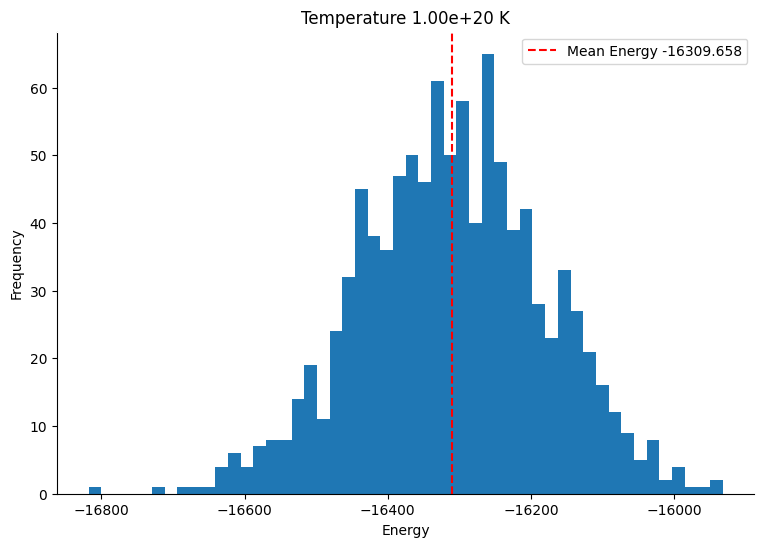

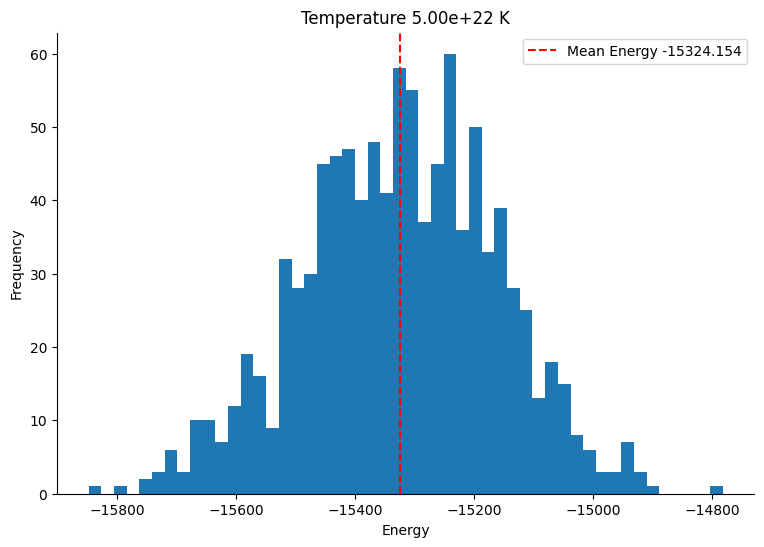

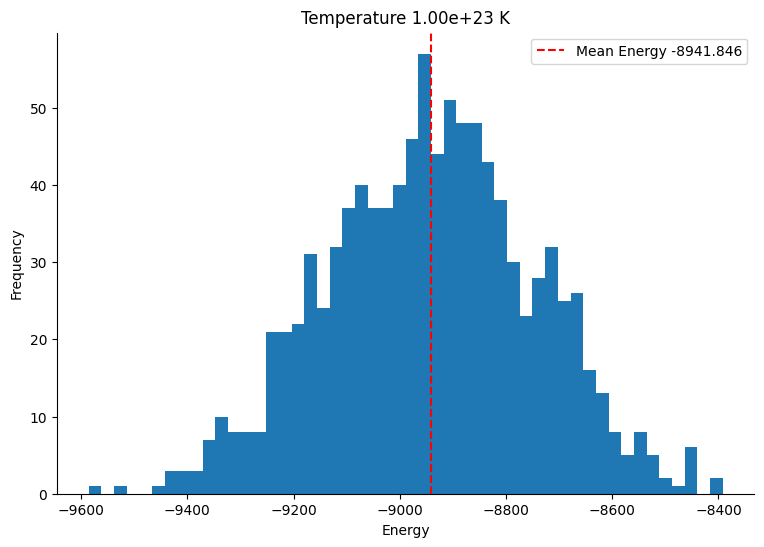

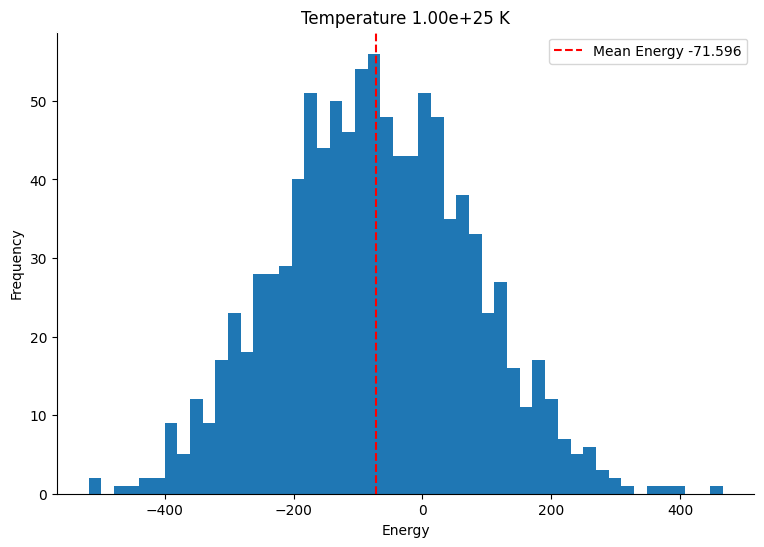

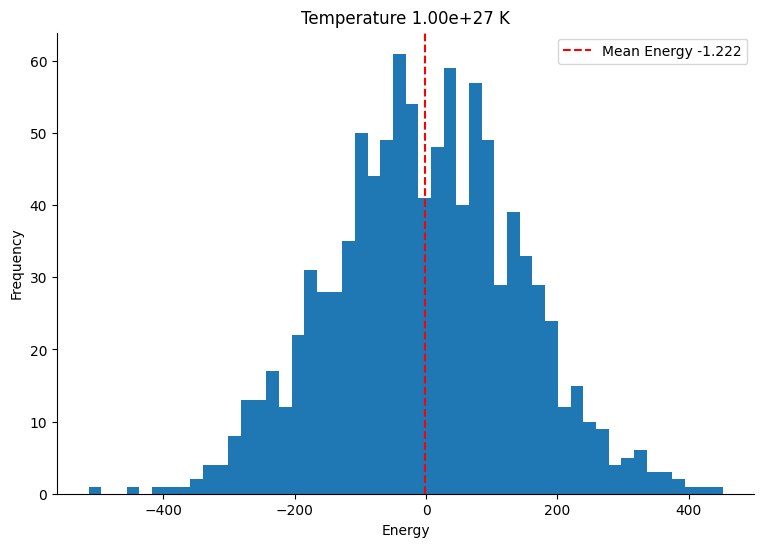

In [183]:
def plotEnergyHist(temperature, include_mean=True, title=True):

    fig, ax = plt.subplots(figsize=(9, 6))

    #Pull dataframe from results dictionary
    df = data[temperature]

    ax.hist(df["energy"], bins=50)

    if title:
        #Show the temperature of the simulation
        ax.set_title(f"Temperature %s K" % "{:.2e}".format(temperature))

    ax.set_xlabel("Energy")
    ax.set_ylabel("Frequency")
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')

    if include_mean:
        #Plot vertical line showing mean of distribution
        ax.axvline(df["energy"].mean(), color="red", linestyle="dashed", label=f"Mean Energy %s" % df["energy"].mean())
        ax.legend(loc="upper right")

    return fig, ax

fig, ax = plotEnergyHist(1e20)
fig.savefig("Energy_Distribution_at_1e20_2D")
plotEnergyHist(5e22)
plotEnergyHist(1e23)
plotEnergyHist(1e25)
fig, ax = plotEnergyHist(1e27)
fig.savefig("Energy_Distribution_at_1e27_2D")





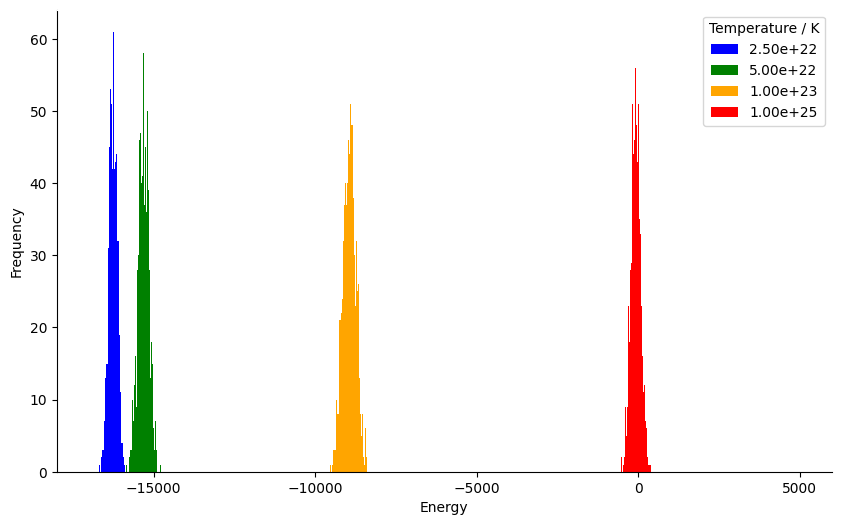

In [160]:
fig, ax = plt.subplots(figsize=(10, 6))

#Plotting multiple distributions on one graph
#Lists to hold temperatures to be plotted and their associated colour
temperatures = [2.5e22, 5e22, 1e23, 1e25]
bins = [20, 30, 50, 50]
colors = ["blue", "green", "orange", "red"]

#Loop through temperatures
for t in range(len(temperatures)):

    temperature = temperatures[t]
    df = data[temperature]
    #Plot histogram with associated colour
    ax.hist(df["energy"], bins=50, label=f"%s" % "{:.2e}".format(temperature), color=colors[t])

ax.set_xlim(-18000, 6000)
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
ax.legend(title="Temperature / K", loc="upper right")
ax.set_ylabel("Frequency")
ax.set_xlabel("Energy")

fig.savefig("Energy_Histogram_Multiple_Temps_2D.png")

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Temperature 1.00e+27 K'}, xlabel='Magnetism', ylabel='Frequency'>)

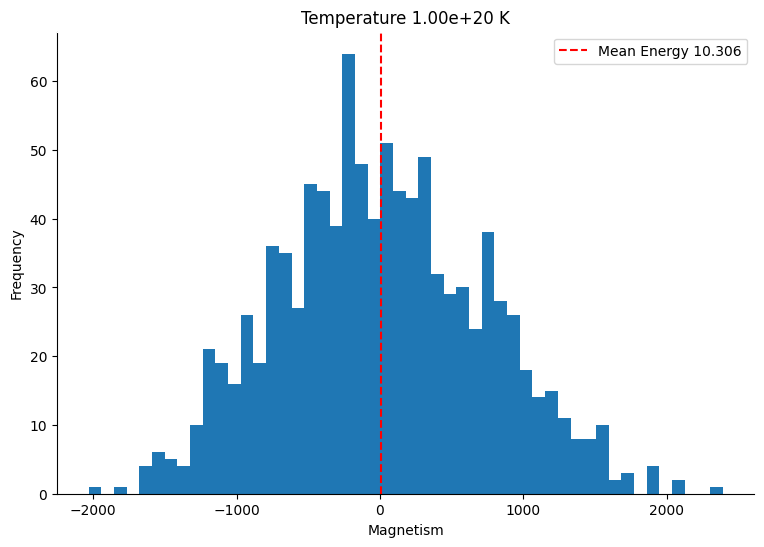

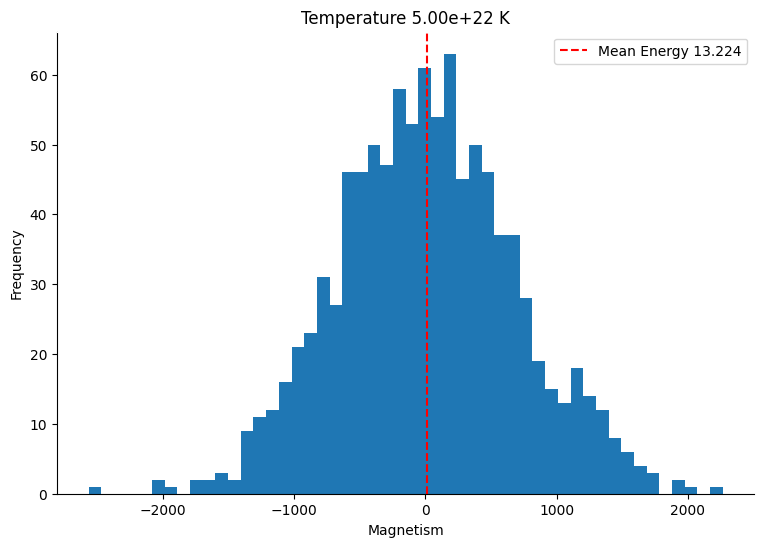

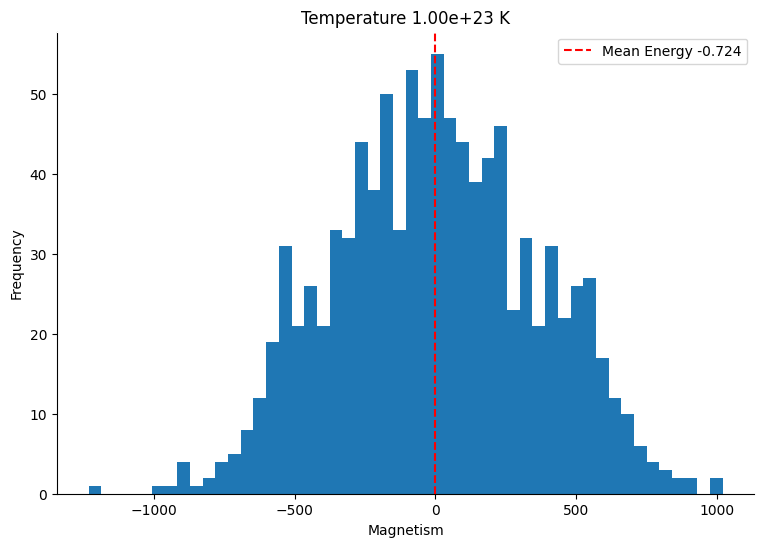

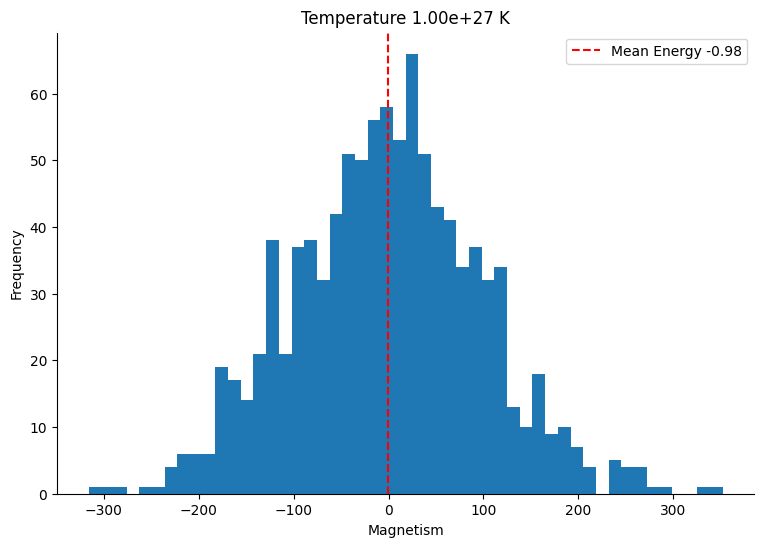

In [177]:
def plotMagnetismHist(temperature, include_mean=True, title=True):

    fig, ax = plt.subplots(figsize=(9, 6))

    #Pull dataframe from results dictionary
    df = data[temperature]

    ax.hist(df["magnetism"], bins=50)

    if title:
        #Show the temperature of the simulation
        ax.set_title(f"Temperature %s K" % "{:.2e}".format(temperature))

    ax.set_xlabel("Magnetism")
    ax.set_ylabel("Frequency")
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')

    if include_mean:
        #Plot vertical line showing mean of distribution
        ax.axvline(df["magnetism"].mean(), color="red", linestyle="dashed", label=f"Mean Energy %s" % df["magnetism"].mean())
        ax.legend(loc="upper right")

    return fig, ax

plotMagnetismHist(1e20)
plotMagnetismHist(5e22)
plotMagnetismHist(1e23)
plotMagnetismHist(1e27)




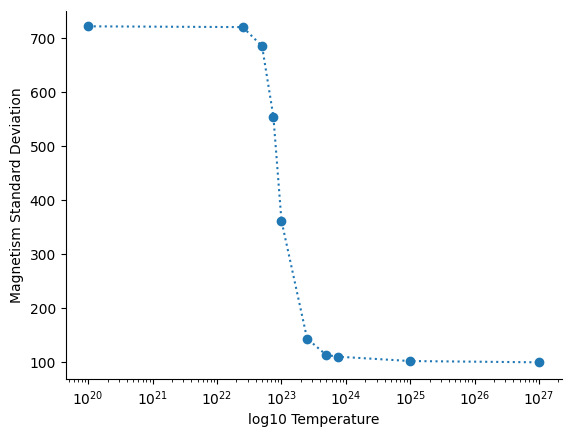

In [182]:
stds = []

for temp in data.keys():
    df = data[temp]
    stds.append(np.std(df["magnetism"]))

fig, ax = plt.subplots()

ax.plot(data.keys(), stds, ls="dotted")
ax.scatter(data.keys(), stds)
ax.set_xscale("log")
ax.set_xlabel("log10 Temperature")
ax.set_ylabel("Magnetism Standard Deviation")
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')

fig.savefig("Magnetism_STD_Vs_Temperature_2D")



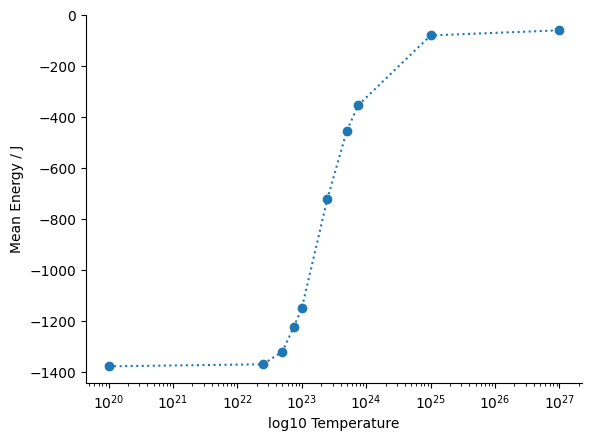

In [80]:
fig, ax = plt.subplots()

mean_energies = []

for temp in data.keys():
    mean_energies.append(data[temp]["energy"].mean())

ax.scatter(data.keys(), mean_energies)
ax.plot(data.keys(), mean_energies, ls="dotted")

ax.set_ylabel("Mean Energy / J")
ax.set_xlabel("log10 Temperature")
ax.set_xscale("log")
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
fig.savefig("images/Mean_Energy_Vs_Temperature_2D.png")